In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# COVID-19 DASHBOARD

In [2]:
repo = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json'
naz = repo + '/dpc-covid19-ita-andamento-nazionale.json'
reg = repo + '/dpc-covid19-ita-regioni.json'
prov = repo + '/dpc-covid19-ita-province.json'
df_naz_raw = pd.read_json(naz, convert_dates=['data'])
df_naz = df_naz_raw.set_index('data')
df_reg_raw = pd.read_json(reg, convert_dates=['data'])
df_reg = df_reg_raw.set_index('data')
df_prov_raw = pd.read_json(prov, convert_dates=['data'])
df_prov = df_prov_raw.set_index('data')

## Lombardia

### Complessivo

,totale_attualmente_positivi,isolamento_domiciliare,ricoverati_con_sintomi,terapia_intensiva,deceduti
data,,,,,
2020-03-12 17:00:00,6896,2044,4247,605,744
2020-03-13 17:00:00,7732,2647,4435,650,890


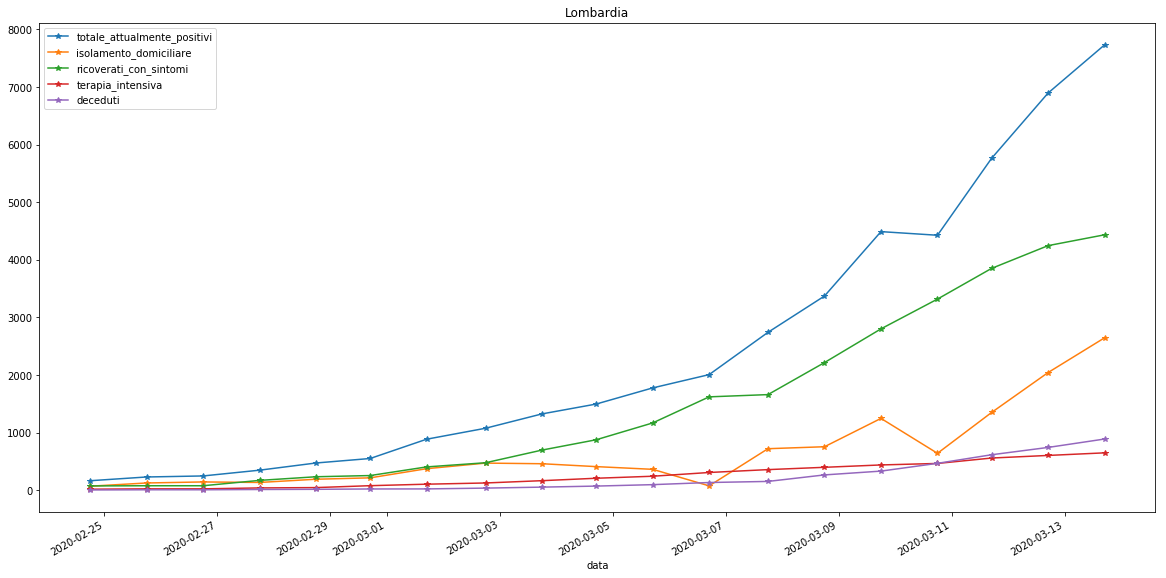

In [3]:
display(df_reg[df_reg['denominazione_regione']=='Lombardia'].loc[df_reg.index.unique()[-2:],
                                                                 ['totale_attualmente_positivi',
                                                                  'isolamento_domiciliare',
                                                                  'ricoverati_con_sintomi',
                                                                  'terapia_intensiva',
                                                                  'deceduti']])
plt.rcParams['figure.figsize'] = [20, 10]
df_reg[df_reg['denominazione_regione']=='Lombardia'].plot(y=['totale_attualmente_positivi',
                                                             'isolamento_domiciliare',
                                                             'ricoverati_con_sintomi',
                                                             'terapia_intensiva',
                                                             'deceduti'],
                                                          title='Lombardia',
                                                          style='*-')
plt.show()

### Dettaglio province

,BG,BS,CO,CR,LC,LO,MN,MI,MB,PV,SO,VA
data,,,,,,,,,,,,
2020-03-12 17:00:00,2136.0,1598.0,98.0,1302.0,199.0,1123.0,169.0,1146.0,130.0,468.0,23.0,98.0
2020-03-13 17:00:00,2368.0,1784.0,118.0,1344.0,237.0,1133.0,187.0,1307.0,143.0,482.0,23.0,125.0


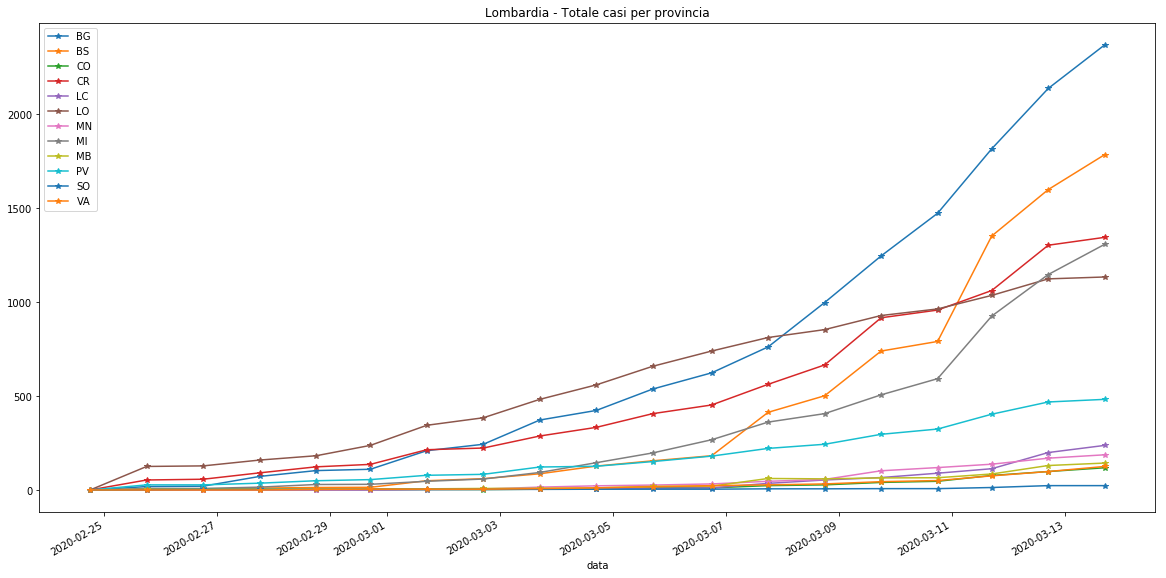

In [4]:
df = pd.DataFrame()
for p in df_prov[df_prov['denominazione_regione']=='Lombardia']['sigla_provincia'].unique()[:-1]:
    df[p] = df_prov[df_prov['sigla_provincia']==p]['totale_casi']
display(df.loc[df.index.unique()[-2:]])
df.plot(title='Lombardia - Totale casi per provincia', style='*-')
plt.legend(loc='upper left')
plt.show()

## Italia

### Complessivo

,totale_attualmente_positivi,isolamento_domiciliare,ricoverati_con_sintomi,terapia_intensiva,deceduti
data,,,,,
2020-03-12 17:00:00,12839,5036,6650,1153,1016
2020-03-13 17:00:00,14955,6201,7426,1328,1266


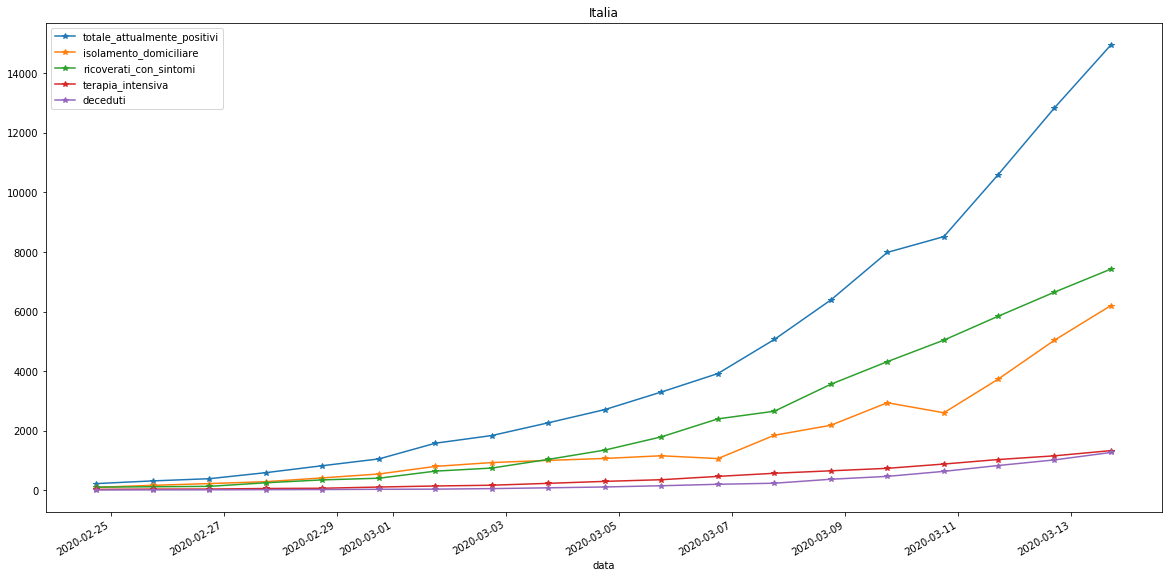

In [5]:
df_naz.plot(y=['totale_attualmente_positivi',
               'isolamento_domiciliare',
               'ricoverati_con_sintomi',
               'terapia_intensiva',
               'deceduti'],
            title='Italia',
            style='*-')
display(df_naz.loc[df_naz.index.unique()[-2:],
                   ['totale_attualmente_positivi',
                    'isolamento_domiciliare',
                    'ricoverati_con_sintomi',
                    'terapia_intensiva',
                    'deceduti']])
plt.show()

### Dettaglio regioni

data,2020-03-12 17:00:00,2020-03-13 17:00:00
denominazione_regione,,
Abruzzo,84,89
Basilicata,8,10
Calabria,33,38
Campania,179,220
Emilia Romagna,1947,2263
Friuli Venezia Giulia,167,257
Lazio,200,277
Liguria,274,345
Lombardia,8725,9820


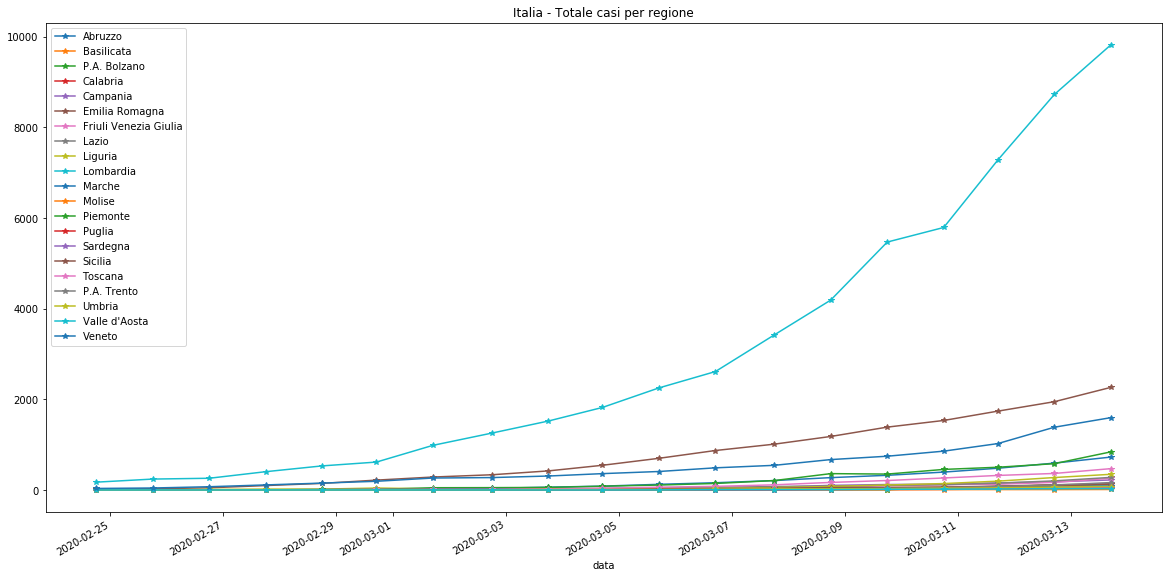

In [6]:
display(df_reg_raw.pivot(index='denominazione_regione',
                 columns='data',
                 values='totale_casi').iloc[:, -2:])
df = pd.DataFrame()
for p in df_reg['denominazione_regione']:
    df[p] = df_reg[df_reg['denominazione_regione']==p]['totale_casi']
df.plot(title='Italia - Totale casi per regione', style='*-')
plt.legend(loc='upper left')
plt.show()

## Modelling
A model is able to provide a forecast of the evolution of a dynamic system, given the current state.
Classical models related to epidemics are *SIR* and *SEIR*.
### SIR
[SIR](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model) (**S**usceptible **I**nfectious **R**ecovered) model divides a population between:
- susceptible individuals, that are healthy but at risk of developing the illness,
- infective individuals, that are currently infected and able to transmit the disease,
- resistant individuals, that cannot be infected (either immunized or deceased after being infected).

In case of a rapid evolving disease, birth and mortality rate can be neglected, thus giving a constant population:

$$
N = S + I + R
$$

In order to ease calculations, the above equation is expressed with unitless quantities:

$$
\frac{S}{N} + \frac{I}{N} + \frac{R}{N} = s + i + r = 1
$$

The dynamics of this system can be summarized as:
- Susceptible individuals can be infected, with a rate that is proportional to the number of infected individuals $I$, the number of susceptible individuals $S$, the average number of contacts with susceptible individuals of an infectious individual and the probability of transmission of the disease; the product of these last two terms is expressed with $\beta$, yielding:  
$$
\frac{ds}{dt} = -\beta i s
$$


- Infectious individuals recover (or decease) after a given time $T_{r}$; thus the rate of recovering individuals is given by:

$$
\frac{dr}{dt} = \frac{1}{T_{r}} i = \gamma i
$$

- It follows that the variation of infectious individuals is:
$$
\frac{di}{dt} = \beta i s -\gamma i
$$

The complete set of differential equations is then:
$$
\begin{align*}
  \frac{ds}{dt} &= -\beta i s\\ 
  \frac{di}{dt} &= \left(\beta s -\gamma \right) i \\ 
  \frac{dr}{dt} &= \gamma i
\end{align*}
$$

The ratio $R_{0} = \frac{\beta}{\gamma}$ is called [basic reproduction number](https://en.wikipedia.org/wiki/Basic_reproduction_number); this parameter is remarkable since it expresses the ratio between the time to recover $T_{r}$ and the time between new infections $T_{c}$ triggered by an individual, thus $R_{0}$ gives the number of other individuals infected by an infectious individual.  
Furthermore, the equation for the dynamics of infectious individuals can be rewritten as:
$$
\frac{di}{dt} = \left(\beta s -\gamma \right) i = \left(\frac{\beta}{\gamma} s - 1 \right) \gamma i = \left(R_{0} s - 1 \right) \gamma i 
$$
Thus:
$$
\begin{align*}
  R_{0} > \frac{1}{s} \Rightarrow \frac{di}{dt} > 0 \\
  R_{0} < \frac{1}{s} \Rightarrow \frac{di}{dt} < 0
\end{align*}
$$
showing that $R_{0}$ determines whether an epidemic will increase or decrease.
Values of $R_{0}$ for some diseases is shown below:

In [16]:
r0 = pd.DataFrame({'Disease': ['Measles',
                          'Diphteria',
                          'Smallpox',
                          'Polio',
                          'Rubella',
                          'Mumps',
                          'Pertussis',
                          'HIV',
                          'SARS',
                          'COVID-19',
                          'Influenza',
                          'Ebola',
                          'MERS'],
              r'minR0': [12,6,5,5,5,4,5.5,2,2,1.4,2,1.5,1.3],
              r'maxR0': [18,7,7,7,7,7,5.5,5,5,3.9,3,2.5,0.8],
})
display(r0.set_index('Disease'))

,minR0,maxR0
Disease,,
Measles,12.0,18.0
Diphteria,6.0,7.0
Smallpox,5.0,7.0
Polio,5.0,7.0
Rubella,5.0,7.0
Mumps,4.0,7.0
Pertussis,5.5,5.5
HIV,2.0,5.0
SARS,2.0,5.0
